# **Dataset: Wholesale Customer Dataset**

# **Exercise 1: K-Means Clustering for Customer Segmentation**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Wholesale customers data.csv to Wholesale customers data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data = pd.read_csv(list(uploaded.keys())[0])
print(data.head())
print(data.info())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen  

In [4]:
feature = data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

scaler = StandardScaler()
feature_scale = scaler.fit_transform(feature)

In [5]:
# K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(feature_scale)

# Adding cluster labels to DataFrame
data['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


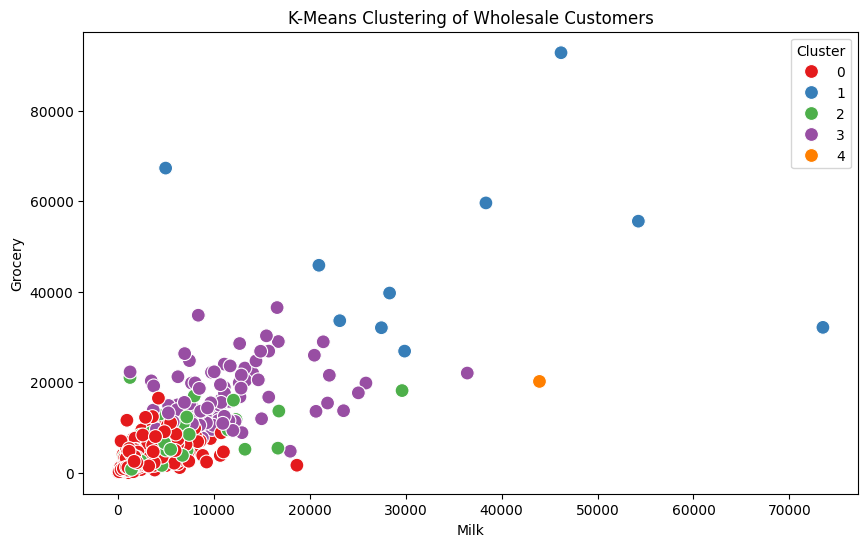

In [7]:
# Visualizeing clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=feature, x='Milk', y='Grocery', hue=data['Cluster'], palette='Set1', s=100)
plt.title('K-Means Clustering of Wholesale Customers')
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.legend(title='Cluster')
plt.show()

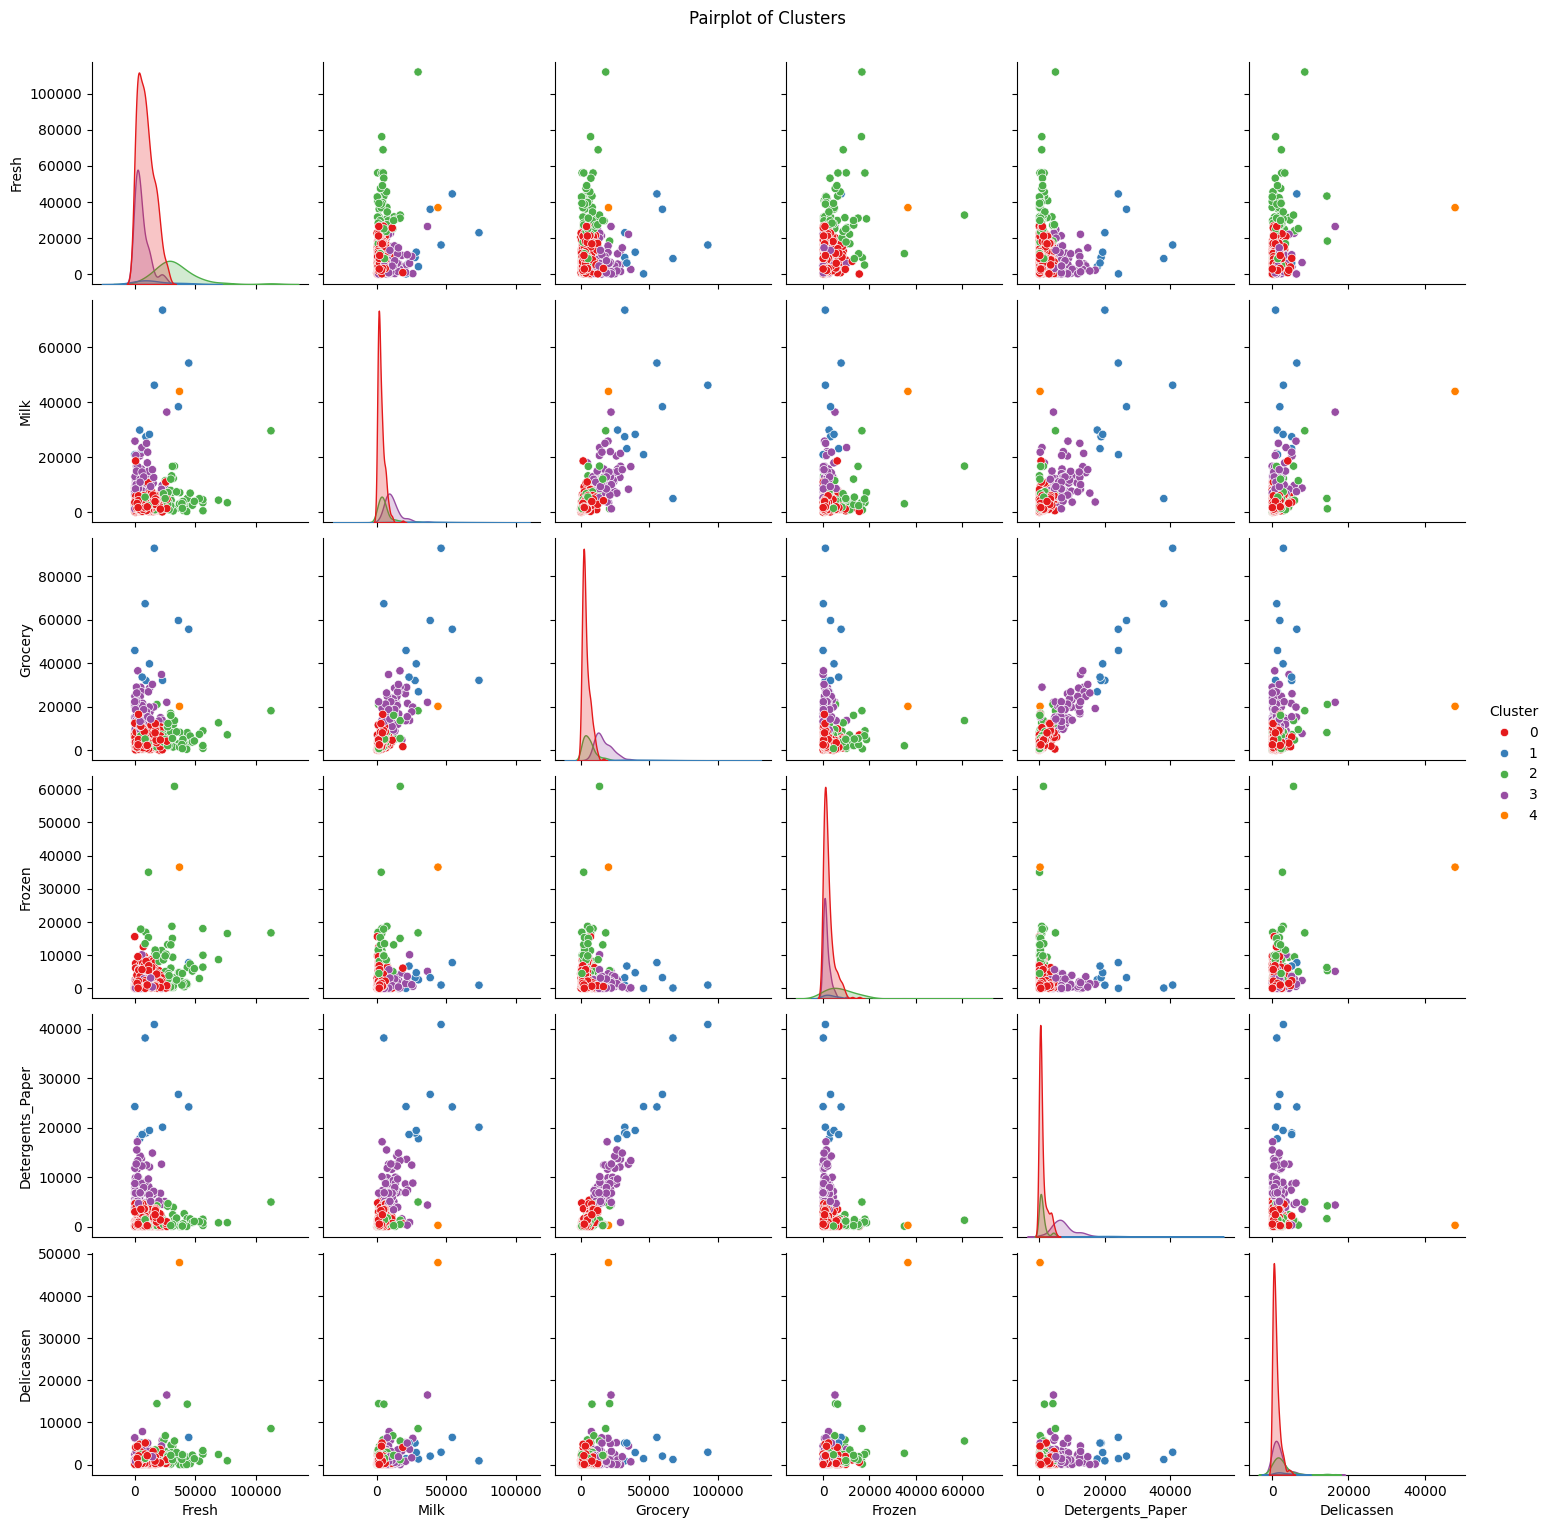

In [8]:
# Pairplot for deeper insights
sns.pairplot(data, vars=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], hue='Cluster', palette='Set1')
plt.suptitle('Pairplot of Clusters', y=1.02)
plt.show()

# **Exercise 2: Evaluating the Optimal Number of Clusters**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [10]:
feature = data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

scaler = StandardScaler()
feature_scale = scaler.fit_transform(feature)

In [14]:
# Elbow Method: WCSS Different no. clusters
elbow = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(feature_scale)
  elbow.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

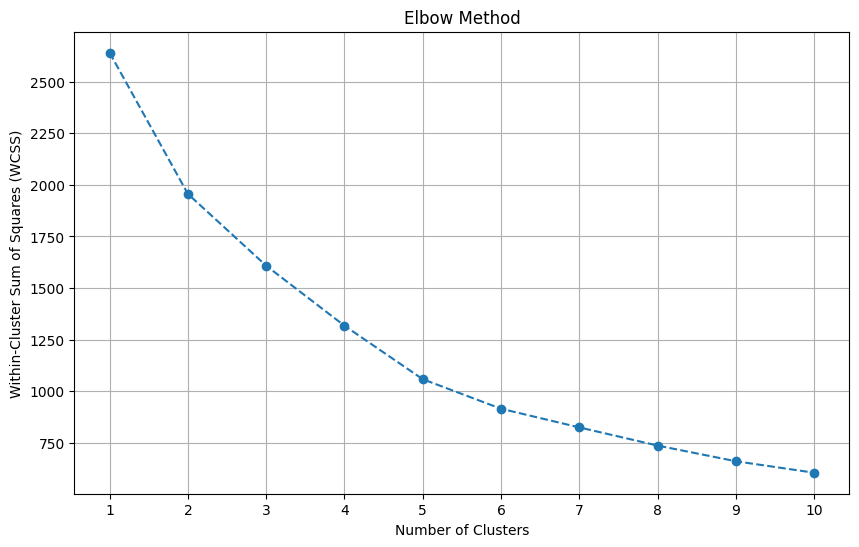

In [15]:
# Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), elbow, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [16]:
# Silhouette Score
sil_score = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  cluster_labels = kmeans.fit_predict(feature_scale)
  silhouette_avg = silhouette_score(feature_scale, cluster_labels)
  sil_score.append(silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

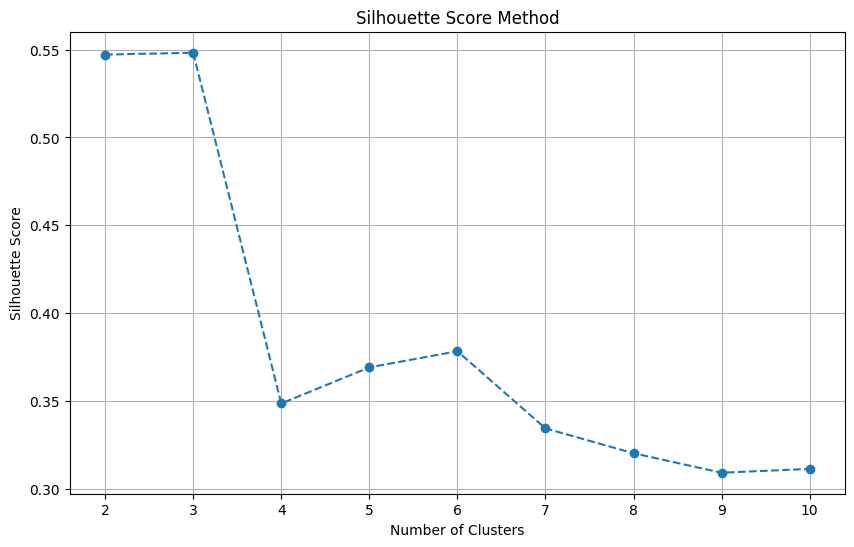

In [17]:
# Silhouette Score graph
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sil_score, marker='o', linestyle='--')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

# **Exercise 3: Cluster Analysis and Interpretation**

In [19]:
# K-Means Clustering
# Let optimal no. of clusters is 3
optimal_cluster = 3

kmeans = KMeans(n_clusters=optimal_cluster, random_state=42)
kmeans.fit(feature_scale)

data['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [20]:
# Analyzing Clusters
cluster_analysis = data.groupby('Cluster').mean()
print(cluster_analysis)

          Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        1.977778  2.511111  10440.933333  19386.422222  28656.088889   
1        1.249364  2.547074  12062.913486   4115.099237   5534.966921   
2        1.000000  2.500000  34782.000000  30367.000000  16898.000000   

               Frozen  Detergents_Paper    Delicassen  
Cluster                                                
0         2190.244444      13327.800000   2374.200000  
1         2940.676845       1696.170483   1299.114504  
2        48701.500000        755.500000  26776.000000  


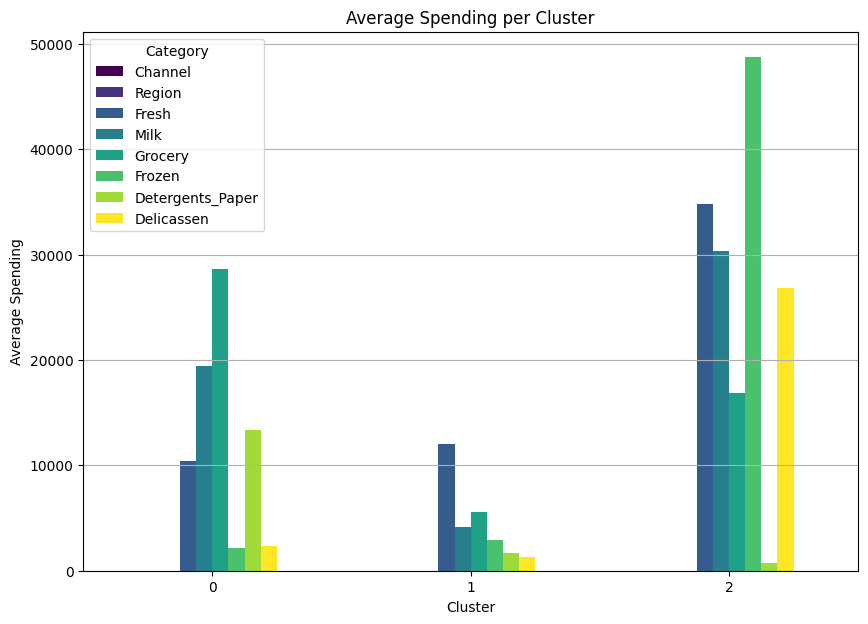

In [25]:
# Visualizing Cluster Characteristic
cluster_analysis.plot(kind='bar', figsize=(10, 7), colormap='viridis')
plt.title('Average Spending per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Spending')
plt.xticks(rotation=0)
plt.legend(title='Category')
plt.grid(axis='y')
plt.show()

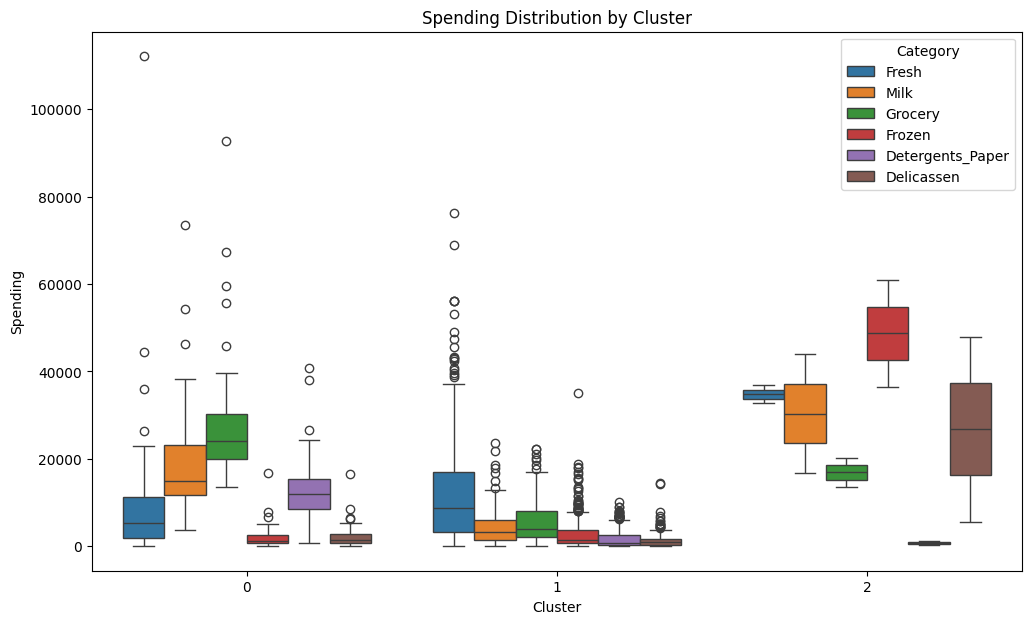

In [28]:
# Box plot to show spending distribution for each category
plt.figure(figsize=(12, 7))
sns.boxplot(x='Cluster', y='value', hue='variable', data=pd.melt(data, id_vars=['Cluster'], value_vars=feature.columns))
plt.title('Spending Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Spending')
plt.legend(title='Category')
plt.show()

# **Exercise 4: Hierarchical Clustering: Dendrogram and Cluster Formation**

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

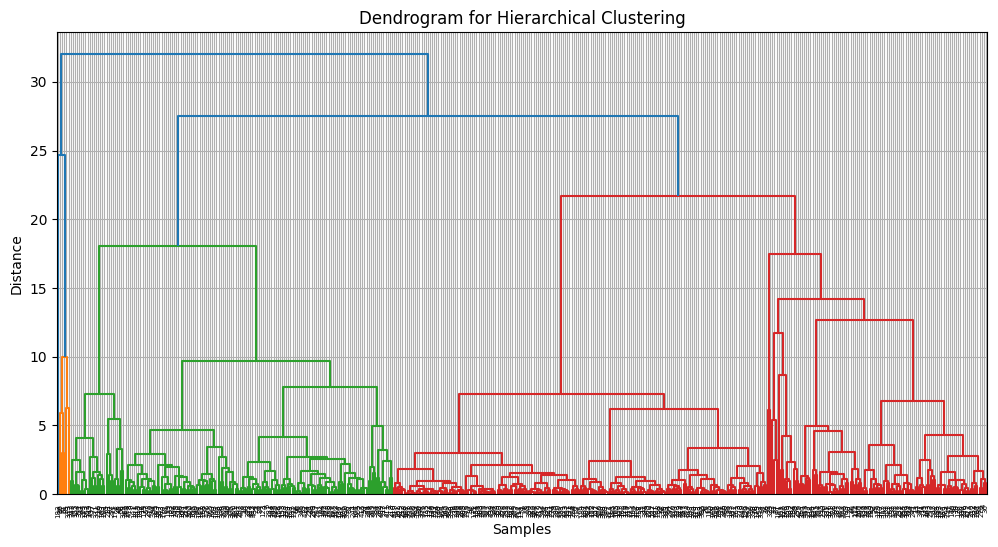

In [32]:
# Hierarchical Clustering and Visualize Dendrogram
link = linkage(feature_scale, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(link, orientation='top', distance_sort='ascending', show_leaf_counts=False)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

In [33]:
# Clusters from Dendrogram
num_clust_hierarchical = 3
clust_label_hierarchical = fcluster(link, num_clust_hierarchical, criterion='maxclust')

data['Hierarchical_Cluster'] = clust_label_hierarchical

In [35]:
# Compare Hierarchical Clustering with K-Means
optimal_clust_kmeans = 3
kmeans = KMeans(n_clusters=optimal_clust_kmeans, random_state=42)
kmeans.fit(feature_scale)

data['KMeans_Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [38]:
compare = data.groupby(['Hierarchical_Cluster', 'KMeans_Cluster']).size().unstack(fill_value=0)
print(compare)

KMeans_Cluster         0    1  2
Hierarchical_Cluster            
1                      5    0  1
2                     38  115  0
3                      2  278  1


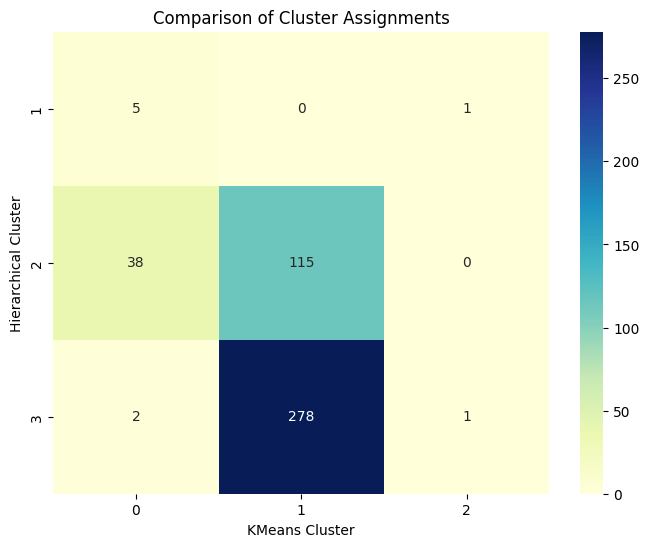

In [39]:
# Visualize Comparison
plt.figure(figsize=(8, 6))
sns.heatmap(compare, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Comparison of Cluster Assignments')
plt.xlabel('KMeans Cluster')
plt.ylabel('Hierarchical Cluster')
plt.show()

# **Exercise 5: Comparison of Clustering Results**

In [40]:
# Silhouette Score for K-Means
sil_kmeans = silhouette_score(feature_scale, data['KMeans_Cluster'])
print(f"Silhouette Score for K-Means: {sil_kmeans:.2f}")

# Silhouette Score for Hierarchical Clustering
sil_hierarchical = silhouette_score(feature_scale, data['Hierarchical_Cluster'])
print(f"Silhouette Score for Hierarchical Clustering: {sil_hierarchical:.2f}")

Silhouette Score for K-Means: 0.55
Silhouette Score for Hierarchical Clustering: 0.26


In [41]:
# WCSS for K-Means
print(f"WCSS for K-Means: {kmeans.inertia_:.2f}")

WCSS for K-Means: 1608.43


In [49]:
from sklearn.decomposition import PCA

# PCA for dimensionality reduction
pca = PCA(n_components=2)
feature_pca = pca.fit_transform(feature_scale)

In [50]:
# Function to plot clusters
def plot_clusters(labels, title):
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x=feature_pca[:, 0], y=feature_pca[:, 1], hue=labels, palette='viridis')
  plt.title(title)
  plt.xlabel('PCA Component 1')
  plt.ylabel('PCA Component 2')
  plt.show()

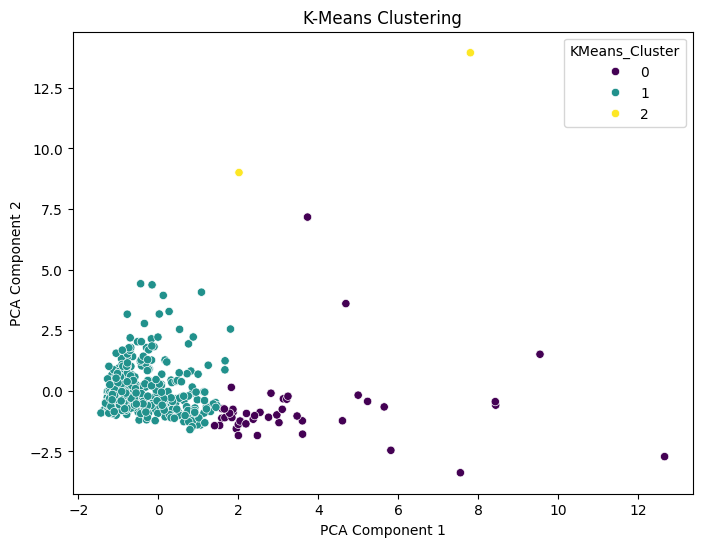

In [51]:
plot_clusters(data['KMeans_Cluster'], 'K-Means Clustering')

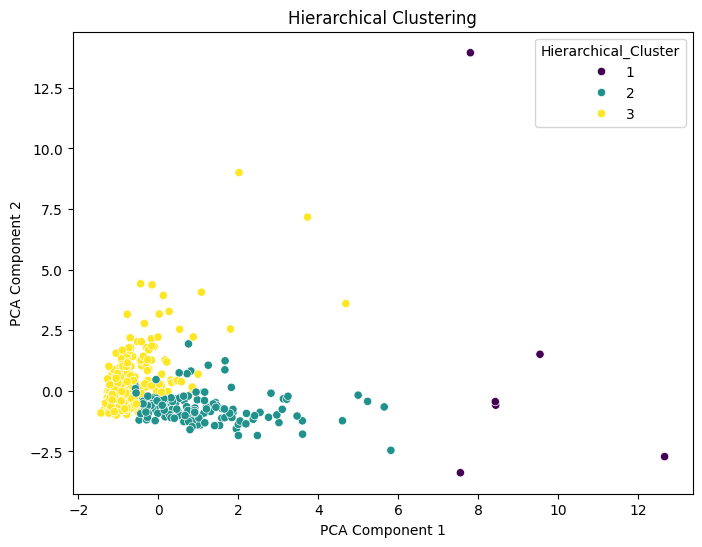

In [52]:
plot_clusters(data['Hierarchical_Cluster'], 'Hierarchical Clustering')